# Prueba de Normalidad en Todas las Variables Numéricas

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, probplot

# Cargar archivo
df = pd.read_csv("data/fact_laptops_preprocesado.csv")

# Seleccionar todas las columnas numéricas (excepto ID)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).drop(columns=["LaptopID"], errors='ignore').columns.tolist()


## Análisis de normalidad
Se aplican histogramas, Q-Q plots, Shapiro-Wilk y Kolmogorov-Smirnov a todas las columnas numéricas del dataset.

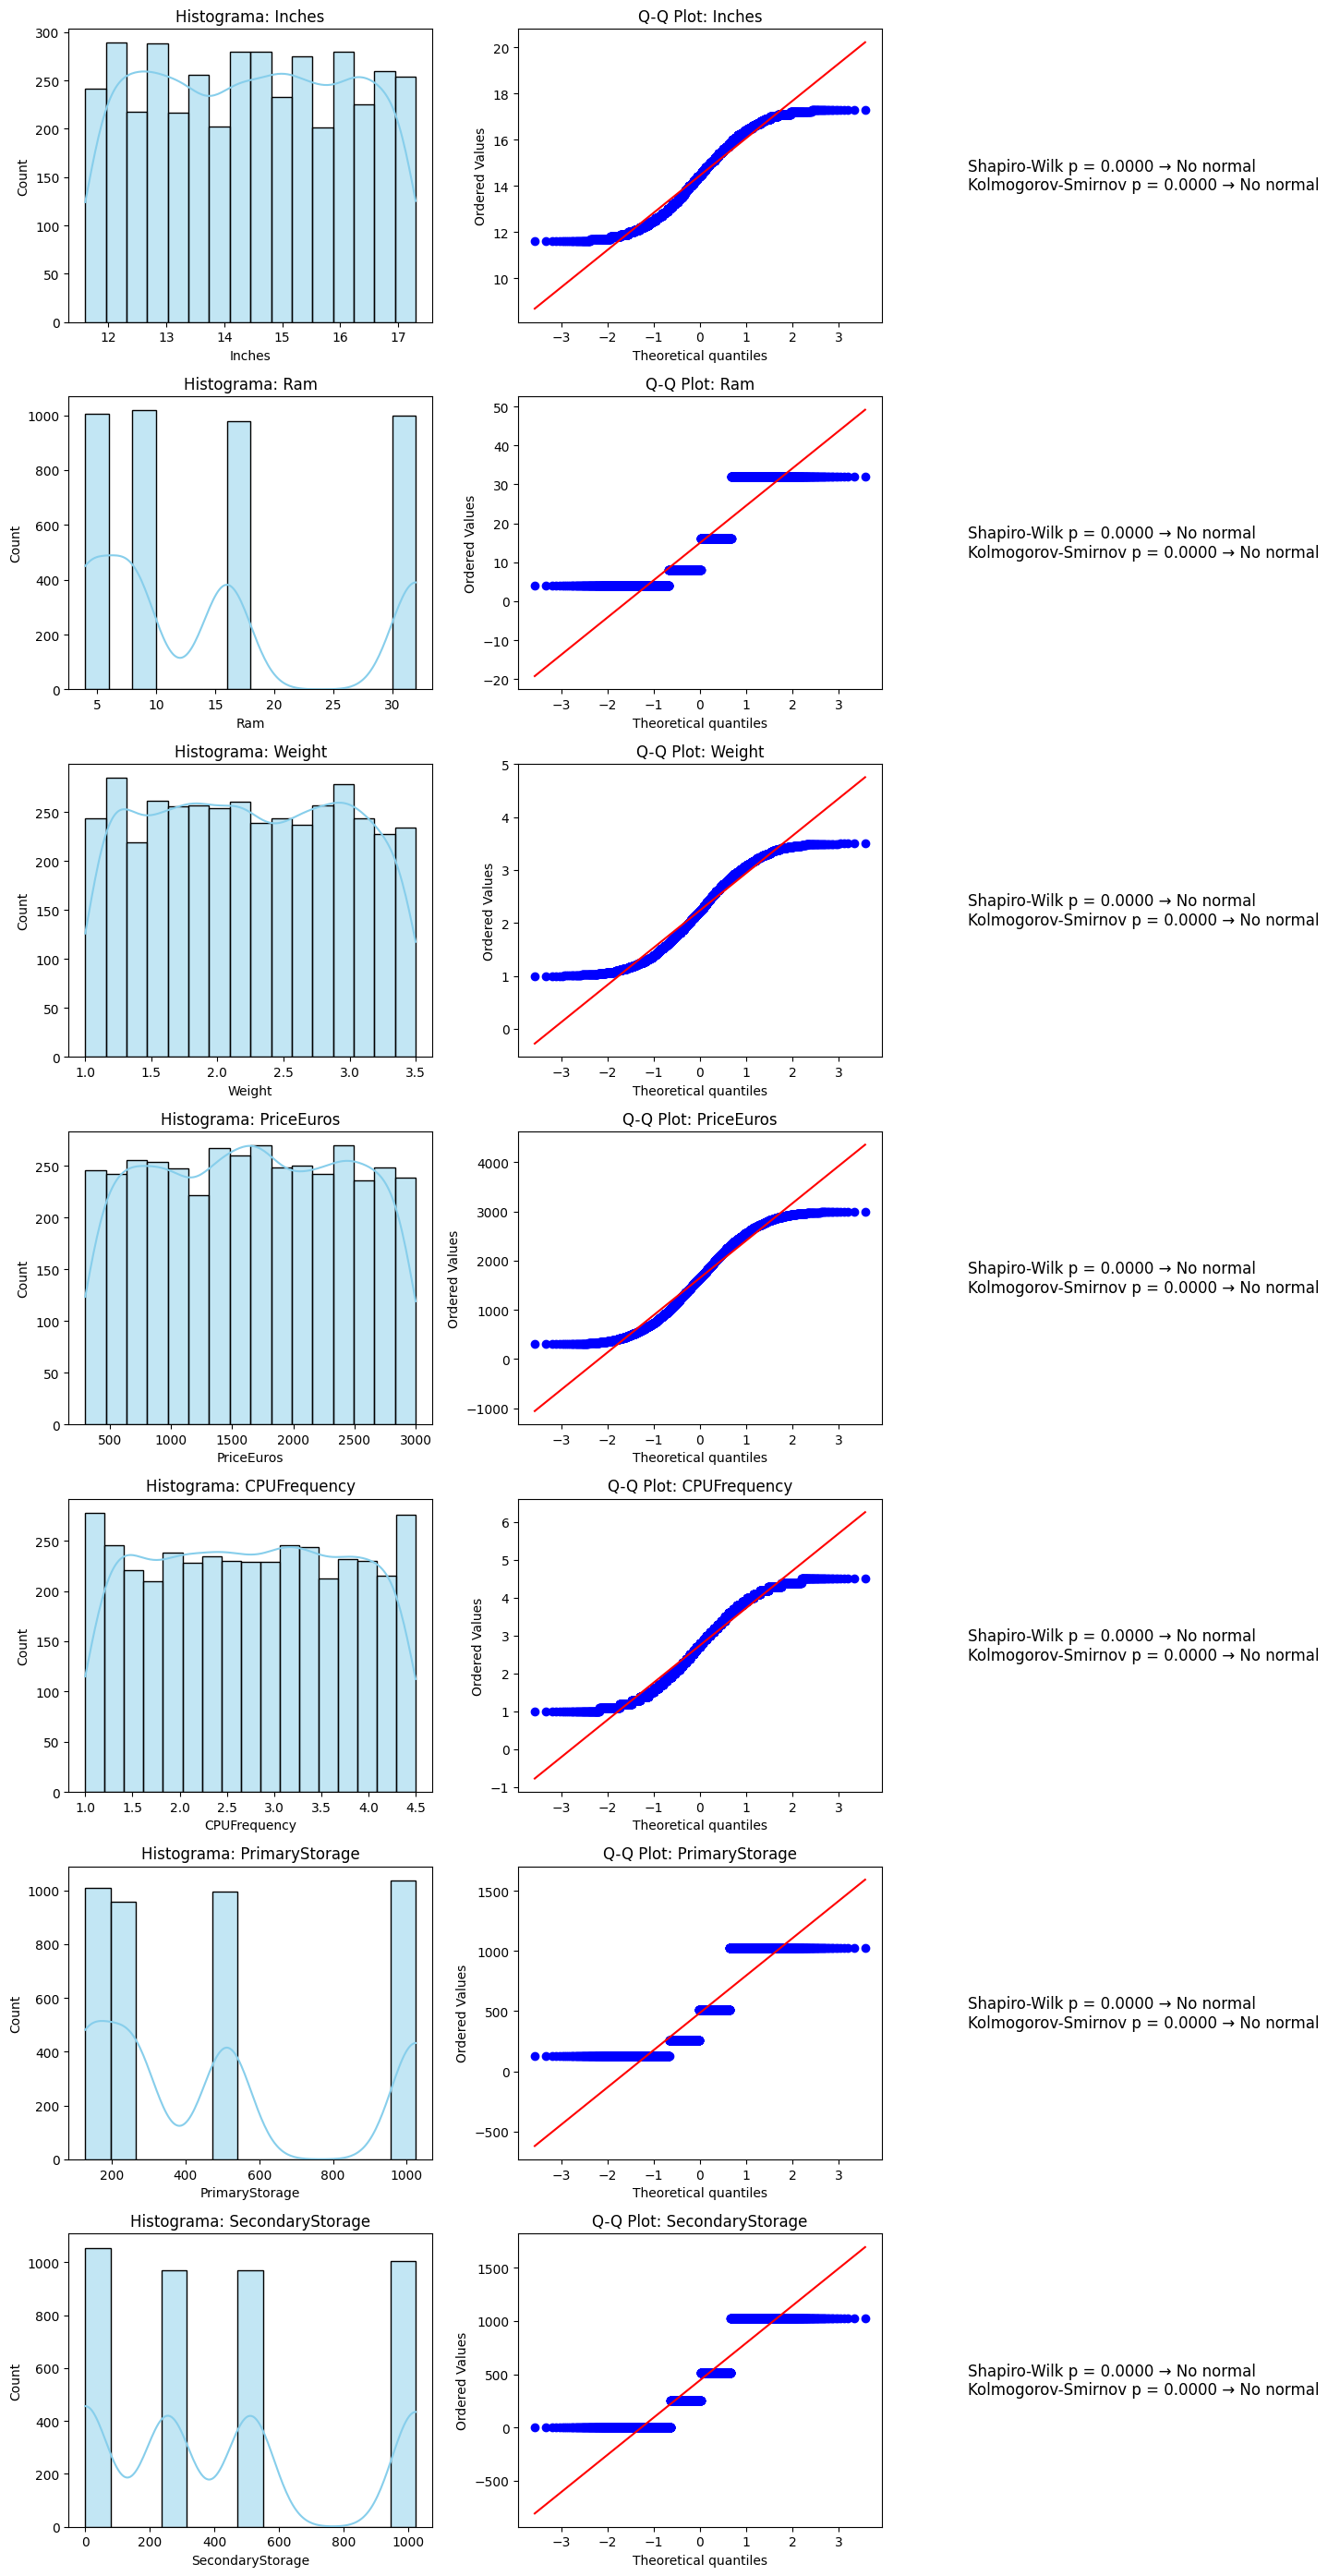

In [3]:

fig, axes = plt.subplots(len(numeric_cols), 3, figsize=(15, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()

    # Histograma
    sns.histplot(data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Histograma: {col}")

    # Q-Q plot
    probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot: {col}")

    # Pruebas estadísticas
    stat_shapiro, p_shapiro = shapiro(data.sample(n=500) if len(data) > 500 else data)
    standardized = (data - data.mean()) / data.std()
    stat_kstest, p_kstest = kstest(standardized, 'norm')

    # Resultados
    resultado = (
        f"Shapiro-Wilk p = {p_shapiro:.4f} → {'Normal' if p_shapiro > 0.05 else 'No normal'}\n"
        f"Kolmogorov-Smirnov p = {p_kstest:.4f} → {'Normal' if p_kstest > 0.05 else 'No normal'}"
    )
    axes[i, 2].axis('off')
    axes[i, 2].text(0, 0.5, resultado, fontsize=12, va='center')

plt.tight_layout()
plt.show()
